In [1]:
import sys
sys.path.insert(0, '../library')
import hmmscan_utils as hu
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "../data"

In [4]:
target_probs = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1.0]
prob_lengths_dict = {}
for target_prob in tqdm(target_probs):
    lengths = []
    for i in range(1, 51):
        file = f"{data_dir}/split_{i}_train_ids_full.fasta_scan.txt"
        hmm_dict = hu.parse_hmmscan_results(data_dir+"/"+file, e_value_threshold=0.01, target_prob=target_prob, length_thresh=1)
        lengths.append(hu.get_I_lengths(hmm_dict))

    concatenated_lengths = np.concatenate(lengths)
    prob_lengths_dict[target_prob] = concatenated_lengths

np.savez(f"{data_dir}/prob_lengths_dict.npy", prob_lengths_dict)


  0%|          | 0/11 [00:00<?, ?it/s]

In [85]:
def plotTargetDist(data, targets, bin_limit):
    
    hist_results = {}
    
    f = plt.figure(figsize=(12,16))

    sns.set_style('ticks')

    for plot_idx, prob in enumerate(targets):
        ax = f.add_subplot(4,3,plot_idx+1)
        vals, bins = np.histogram(data[prob], range=(0,bin_limit), bins=bin_limit+1)#int(bin_limit/5))
        #vals = vals / vals.sum()
        bins = (bins[:-1] + bins[1:])*0.5
        ax.plot(bins, vals, label=f'{prob}', marker='o')
        ax.set_title(f'Target Prob: {prob}')
        ax.set_ylim(10000, 30000)
        ax.grid(True)
        
        hist_results[prob] = {'Vals': vals, 'Bins': bins}

    plt.suptitle(f'Distribution of Insertion Lengths Till {bin_limit}')
    plt.xlabel('Length')
    plt.ylabel('Count')

    return hist_results

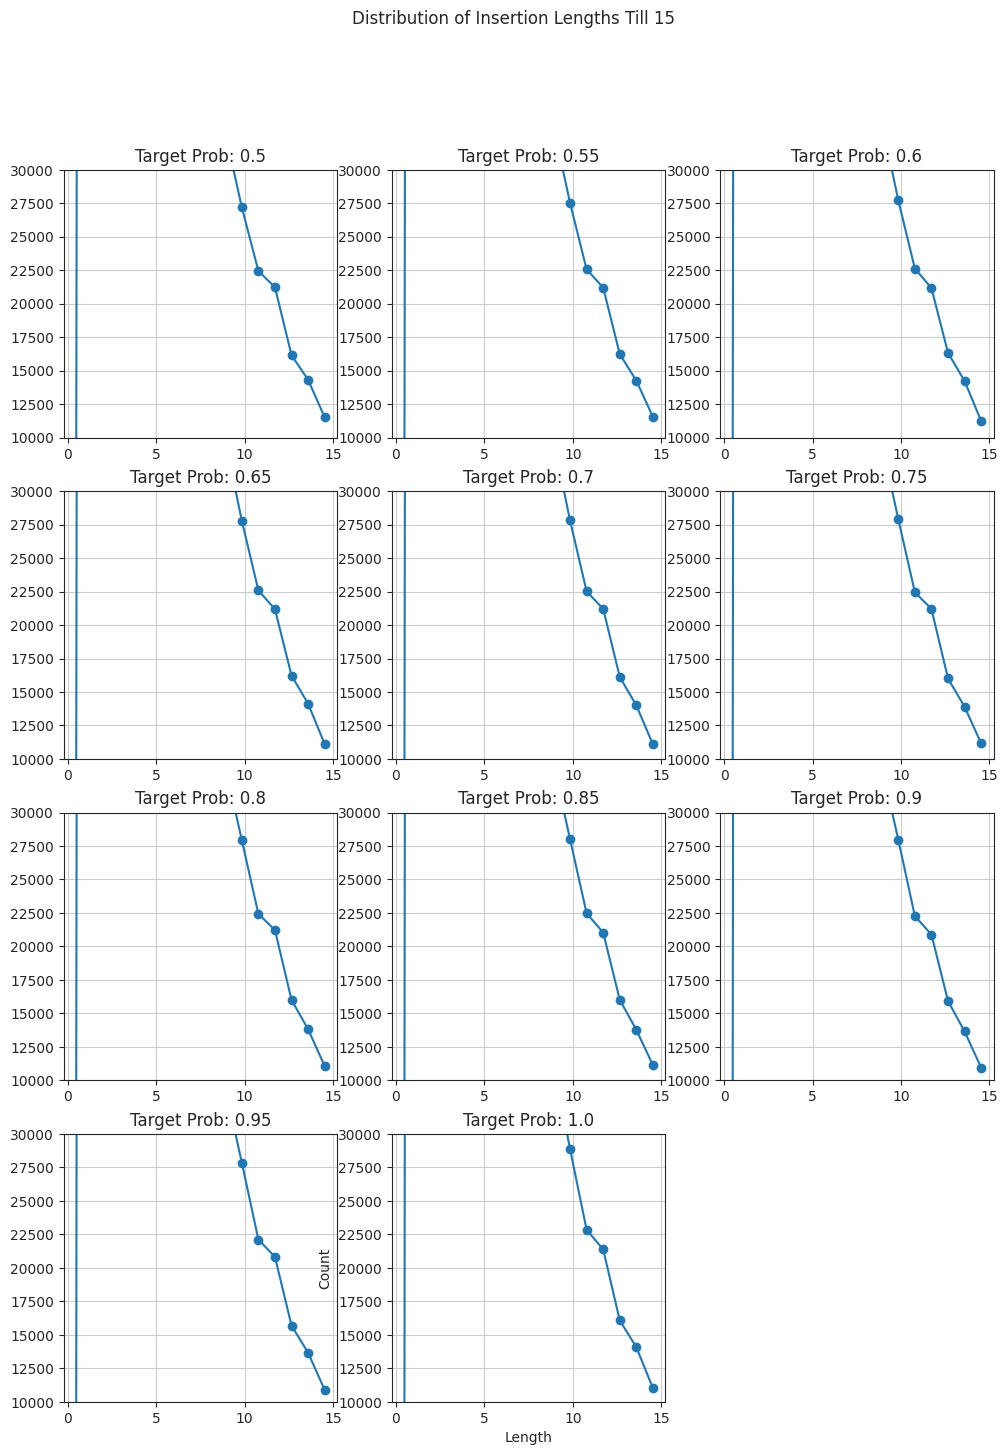

In [86]:
data = np.load(f'{data_dir}/prob_lengths_dict.npy.npz', allow_pickle=True)['arr_0'].item()

target_probs = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1.0]

# bin_1580 = plotTargetDist(data, target_probs, 1580)
# bin_500 = plotTargetDist(data, target_probs, 500)
# bin_100 = plotTargetDist(data, target_probs, 100)
# bin_50 = plotTargetDist(data, target_probs, 50)
bin_50 = plotTargetDist(data, target_probs, 15)

In [2]:
target_probs = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1.0]
prob_frequencies_dict = {}
for target_prob in tqdm(target_probs):
    frequencies = []
    full_length = []
    for i in range(1, 51):
        file = f"{data_dir}/split_{i}_train_ids_full.fasta_scan.txt"
        hmm_dict = hu.parse_hmmscan_results(data_dir+"/"+file, e_value_threshold=0.01, target_prob=target_prob, length_thresh=1)
        f, l = hu.get_I_frequency(hmm_dict)
        frequencies.append(f)
        full_length.append(l)

    concatenated_frequencies = np.concatenate(frequencies)
    oncatenated_frequencies = np.concatenate(full_length)
    prob_frequencies_dict[target_prob] = {'Freq': concatenated_frequencies, 'Len': full_length}

np.savez(f"{data_dir}/prob_frequencies_length_dict.npy", prob_frequencies_dict)

100%|██████████| 11/11 [1:34:26<00:00, 515.13s/it]


In [18]:
def plotFreqDist(data, targets):
    
    hist_results = {}
    
    f = plt.figure(figsize=(12,16))

    sns.set_style('ticks')

    for plot_idx, prob in enumerate(targets):
        ax = f.add_subplot(4,3,plot_idx+1)
        vals, bins = np.histogram(data[prob], bins=20)#int(bin_limit/5))
        # vals = vals / vals.sum()
        bins = (bins[:-1] + bins[1:])*0.5
        ax.plot(bins, vals, label=f'{prob}', marker='o')
        ax.set_title(f'Target Prob: {prob}')
        # ax.set_ylim(0, 1.1)
        ax.set_xlim(0, 0.2)
        ax.grid(True)
        
        hist_results[prob] = {'Vals': vals, 'Bins': bins}

    plt.suptitle(f'Distribution of Insertion Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Count')

    return hist_results

0.5 [991004 205235  96889  53509  26929  17261  10608   6407   4219   3281
   2564   1968   1723    585    371    394    142    132     29      9]
0.55 [992475 206568  96200  53555  26246  16919  10206   6242   4051   2920
   2448   2035   1710    575    388    402    151    130     29      9]
0.6 [993613 207314  96735  52630  25926  16523  10010   6284   3914   2762
   2337   1607   1855    573    470    405    135    129     29      8]
0.65 [995978 206052  97245  51840  26128  16421   9666   6268   3881   2707
   2185   1461   1553    720    459    396    133    131     27      8]
0.7 [996414 208480  95355  51796  25863  16293   9633   6242   3775   2697
   2168   1365   1468    658    370    392    129    129     24      8]
0.75 [996752 209096  95370  51843  25682  15939   9406   6163   3826   2653
   2157   1312   1421    641    331    380    129    127     23      8]
0.8 [999893 206376  95498  51704  25638  15564   9487   6113   3876   2624
   2165   1323   1390    632    326    3

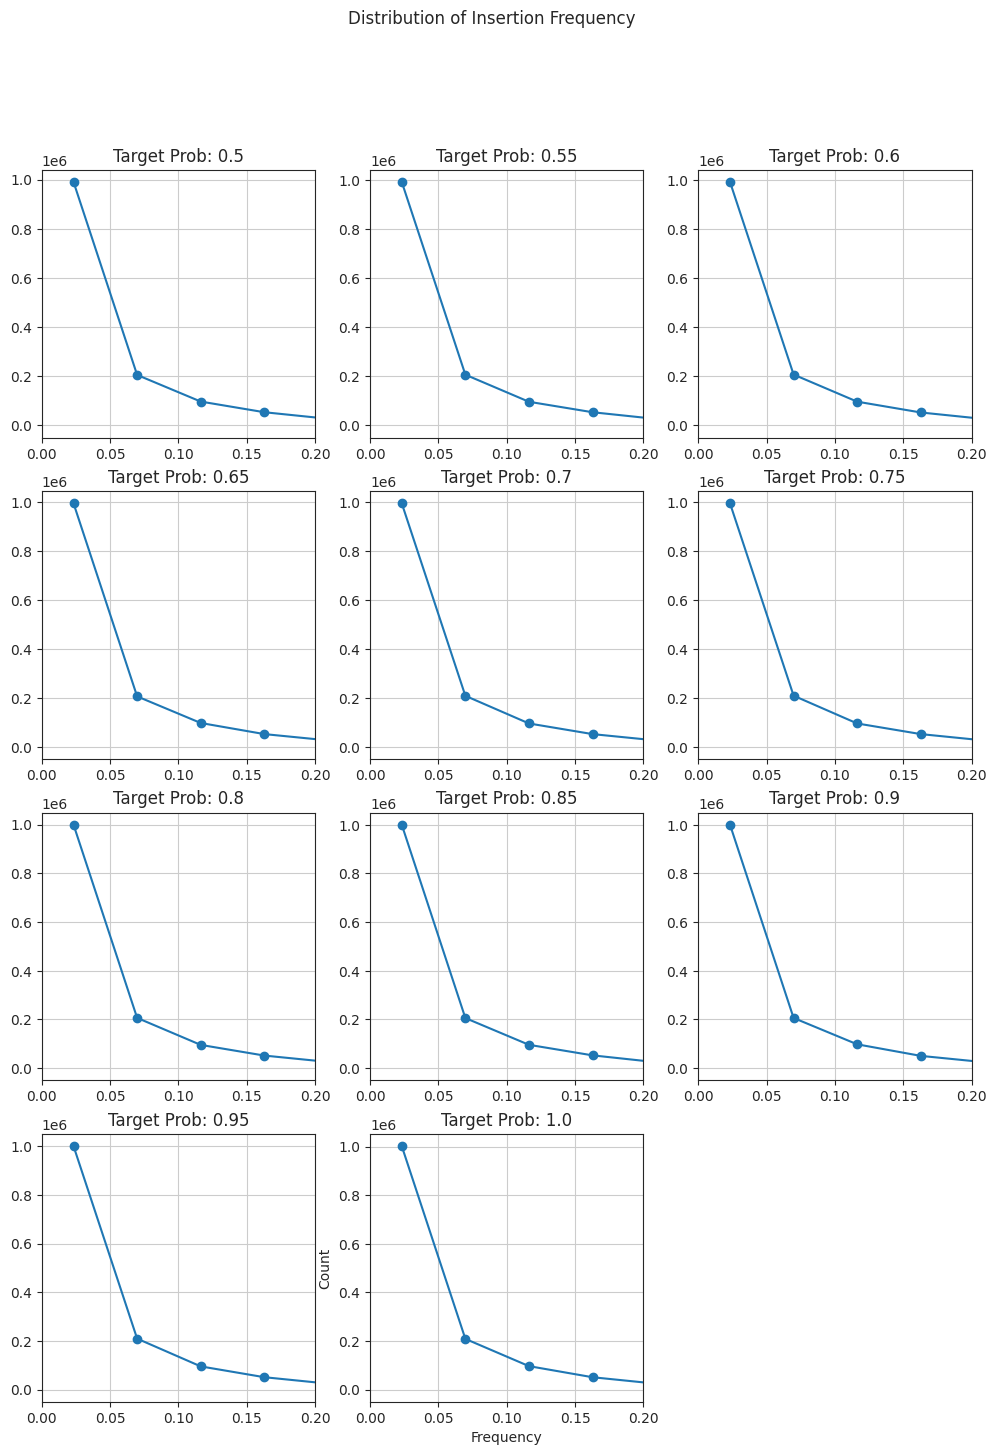

In [19]:
data = np.load(f'{data_dir}/prob_frequencies_dict.npy.npz', allow_pickle=True)['arr_0'].item()

target_probs = [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95,1.0]

bin_50 = plotFreqDist(data, target_probs)

max_probs = [np.where(bin_50[x]['Vals'] != 0)[0][-1]*0.05 for x in bin_50.keys()]

for x in bin_50.keys():
    print(x, bin_50[x]['Vals'])